In [ ]:

# Importing libraries and loading the dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', None) #Setting to display all comuns, without ommitting 

df = pd.read_csv("data/tracks.csv")


In [96]:
# Exploring and understanding the dataset before starting the project

print(df.shape) #Displays us the database size
print(df.columns) #Show us all the columns
print(df.head()) #Display the first few rows
print(df.info()) #Show us about the type, like float, object...

print(df.describe())

(586672, 20)
Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='str')
                       id                                 name  popularity  \
0  35iwgR4jXetI318WEWsa1Q                                Carve           6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista           0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado           0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado           0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening           0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd

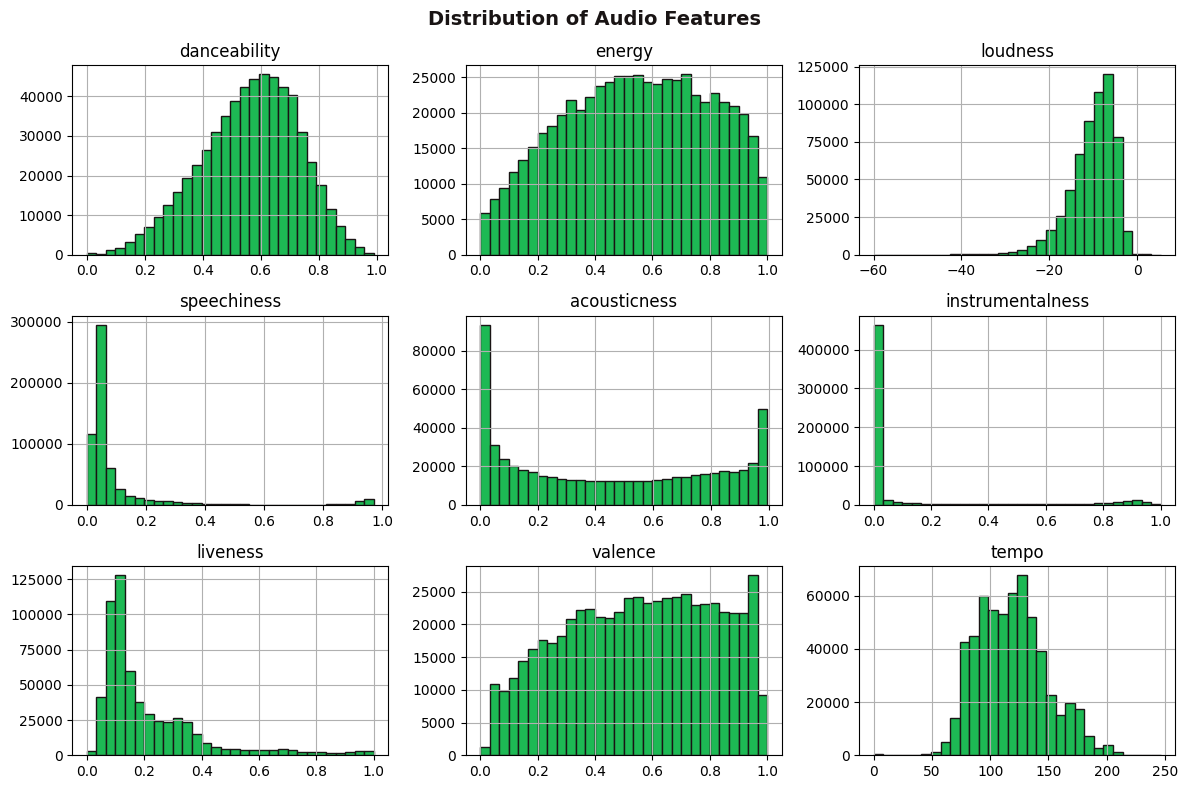

In [98]:

## Setting Spotify colors
SPOTIFY_GREEN = "#1DB954"
SPOTIFY_DARK = "#191414"
SPOTIFY_GRAY = "#B3B3B3"
SPOTIFY_LIGHT_GRAY = "#6b6b6b"


##Making the graphs

df[audio_features].hist( #Using the 'audio_features' to make histograms about all features using 30 bins
    bins=30,
    figsize=(12, 8),
    color=SPOTIFY_GREEN,
    edgecolor=SPOTIFY_DARK
)

plt.suptitle( #plt.suptitle is used for apply subtitles in the graph
    "Distribution of Audio Features",
    fontsize=14,
    fontweight="bold",
    color=SPOTIFY_DARK
)

plt.tight_layout()
plt.show()




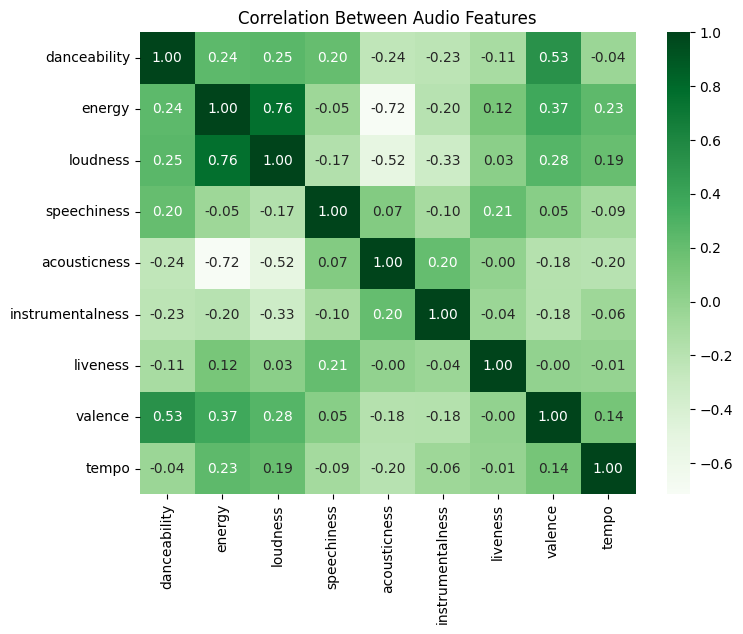

,feature,VIF
0,danceability,15.187706
8,tempo,14.655457
1,energy,12.573902
7,valence,8.760356
2,loudness,7.970734
4,acousticness,4.241444
6,liveness,2.623720
3,speechiness,1.568626
5,instrumentalness,1.421877


In [137]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    df[audio_features].corr(),
    annot=True,
    cmap="Greens",
    fmt=".2f"
)
plt.title("Correlation Between Audio Features")
plt.show()


from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = pd.DataFrame()
X_vif["feature"] = audio_features #Creating a new variable
X_vif["VIF"] = [ 
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

X_vif.sort_values("VIF", ascending=False)



In [146]:
# Selecting only numerical audio features for the baseline model. (Excluding features such as "id", "name"...)
# Focus on numerical audio features to build a simple and interpretable baseline model


audio_features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]


In [154]:
# Creating the target called 'hit' and noticing the proportion betweeen hits and non-hits

df['hit'] = (df["popularity"] >= 70).astype(int)

df['hit'].value_counts(normalize=True)

hit
0    0.987518
1    0.012482
Name: proportion, dtype: float64

In [161]:
X = df[audio_features]
y = df['hit']

# Here, we can se that the feature matrix contains no missing values
X.isna().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [187]:
df['hit'].value_counts(normalize=True)


hit
0    0.987518
1    0.012482
Name: proportion, dtype: float64

In [188]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( #Here we split the dataset into training and test sets for both X and Y. We also define the teste size and fix the random seed to ensure reproducibility
    X,
    y,
    test_size = 0.2,
    random_state=25,
    stratify=y #Ele mantém a proporção de hits e não hits, ou seja, não corremos o risco de termos algo 100% de não-hits. De maneira geral, é uma amostra estratificada, tendo uma quantidade proporcional de hits ou não.
)

In [189]:
#Initializing the model

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Why standardize? Because some features are measured on differents scales, such as "loudness". From a statistical perspective, standardization is required before fitting the model

X_train_scaled = scaler.fit_transform(X_train) #Create an object to standard the variables around 0 and standard desviation 1 
X_test_scaled = scaler.transform(X_test)

In [190]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=25
)

model.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",25
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [191]:
# Creating a coefficient dataframe

coef_plot = coef_df.sort_values("coefficient")


coef_df = pd.DataFrame( {
    "feature": audio_features,
    "coefficient": model.coef_[0]
}).sort_values(by="coefficient", ascending=False)

coef_df["odds_ratio"] = np.exp(coef_df["coefficient"])
coef_df

,feature,coefficient,odds_ratio
2,loudness,1.362466,3.905813
0,danceability,0.579720,1.785538
8,tempo,0.092104,1.096479
3,speechiness,0.034156,1.034746
6,liveness,-0.203084,0.816209
5,instrumentalness,-0.324466,0.722913
4,acousticness,-0.527945,0.589816
7,valence,-0.543495,0.580715
1,energy,-0.590178,0.554229


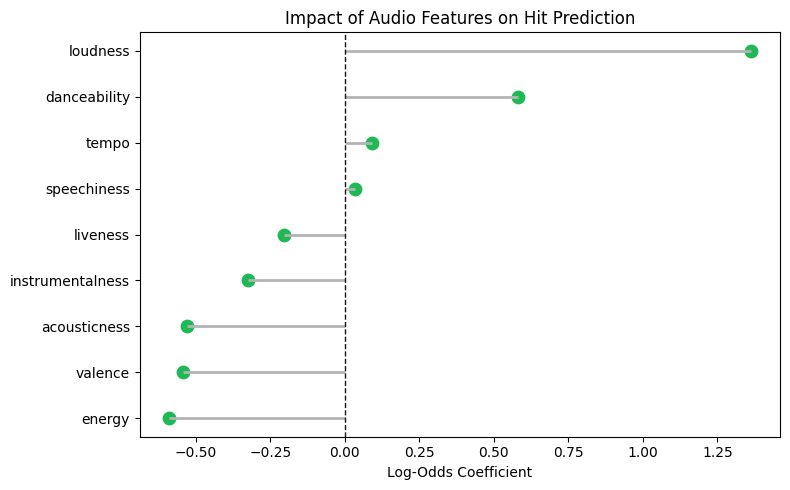

In [192]:
plt.figure(figsize=(8, 5))

plt.hlines(
    y=coef_plot["feature"],
    xmin=0,
    xmax=coef_plot["coefficient"],
    color="#B3B3B3",
    linewidth=2
)

plt.scatter(
    coef_plot["coefficient"],
    coef_plot["feature"],
    color="#1DB954",
    s=80
)

plt.axvline(0, color="#191414", linestyle="--", linewidth=1)

plt.title("Impact of Audio Features on Hit Prediction")
plt.xlabel("Log-Odds Coefficient")

plt.tight_layout()
plt.show()
